<a href="https://colab.research.google.com/github/IranMartinez/challenge-TelecomX/blob/main/telecomX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando Bibliotecas y Datos


In [2]:
import requests
import pandas as pd


In [3]:
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"

response = requests.get(url)
data = response.json()

df=pd.DataFrame(data)
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [4]:
df = pd.json_normalize(data)
df

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [6]:
for col in df.columns:
  print(f"Valores unicos en la columna'{col}:{df[col].nunique()}'")

  if df[col].nunique() < 50:
    print(df[col].unique())
    print('-'*50)

Valores unicos en la columna'customerID:7267'
Valores unicos en la columna'Churn:3'
['No' 'Yes' '']
--------------------------------------------------
Valores unicos en la columna'customer.gender:2'
['Female' 'Male']
--------------------------------------------------
Valores unicos en la columna'customer.SeniorCitizen:2'
[0 1]
--------------------------------------------------
Valores unicos en la columna'customer.Partner:2'
['Yes' 'No']
--------------------------------------------------
Valores unicos en la columna'customer.Dependents:2'
['Yes' 'No']
--------------------------------------------------
Valores unicos en la columna'customer.tenure:73'
Valores unicos en la columna'phone.PhoneService:2'
['Yes' 'No']
--------------------------------------------------
Valores unicos en la columna'phone.MultipleLines:3'
['No' 'Yes' 'No phone service']
--------------------------------------------------
Valores unicos en la columna'internet.InternetService:3'
['DSL' 'Fiber optic' 'No']
--------

In [7]:
print("Numero de duplicados",df.duplicated().sum())

Numero de duplicados 0


In [8]:
print("Numero de valores nulos",df.isnull().sum())

Numero de valores nulos customerID                   0
Churn                        0
customer.gender              0
customer.SeniorCitizen       0
customer.Partner             0
customer.Dependents          0
customer.tenure              0
phone.PhoneService           0
phone.MultipleLines          0
internet.InternetService     0
internet.OnlineSecurity      0
internet.OnlineBackup        0
internet.DeviceProtection    0
internet.TechSupport         0
internet.StreamingTV         0
internet.StreamingMovies     0
account.Contract             0
account.PaperlessBilling     0
account.PaymentMethod        0
account.Charges.Monthly      0
account.Charges.Total        0
dtype: int64


In [9]:
df.apply(lambda x: x.astype(str).str.strip()=='').sum()

,0
customerID,0
Churn,224
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


In [10]:
df['account.Charges.Total'] = df['account.Charges.Total'].apply(pd.to_numeric,errors='coerce')
print(df['account.Charges.Total'].dtype)

float64


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [12]:
df = df[df['Churn'].str.strip()!='']
print("Numero de filas despues de eliminar vacios en 'Churn':",len(df))

Numero de filas despues de eliminar vacios en 'Churn': 7043


In [13]:
df.apply(lambda x: x.astype(str).str.strip()=='').sum()

,0
customerID,0
Churn,0
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7043 non-null   object 
 1   Churn                      7043 non-null   object 
 2   customer.gender            7043 non-null   object 
 3   customer.SeniorCitizen     7043 non-null   int64  
 4   customer.Partner           7043 non-null   object 
 5   customer.Dependents        7043 non-null   object 
 6   customer.tenure            7043 non-null   int64  
 7   phone.PhoneService         7043 non-null   object 
 8   phone.MultipleLines        7043 non-null   object 
 9   internet.InternetService   7043 non-null   object 
 10  internet.OnlineSecurity    7043 non-null   object 
 11  internet.OnlineBackup      7043 non-null   object 
 12  internet.DeviceProtection  7043 non-null   object 
 13  internet.TechSupport       7043 non-null   object 
 1

In [15]:
print("Numero de nulos \n",df.isnull().sum())

Numero de nulos 
 customerID                    0
Churn                         0
customer.gender               0
customer.SeniorCitizen        0
customer.Partner              0
customer.Dependents           0
customer.tenure               0
phone.PhoneService            0
phone.MultipleLines           0
internet.InternetService      0
internet.OnlineSecurity       0
internet.OnlineBackup         0
internet.DeviceProtection     0
internet.TechSupport          0
internet.StreamingTV          0
internet.StreamingMovies      0
account.Contract              0
account.PaperlessBilling      0
account.PaymentMethod         0
account.Charges.Monthly       0
account.Charges.Total        11
dtype: int64


In [16]:
df = df.dropna(subset=['account.Charges.Total'])

In [17]:
print("Numero de nulos \n",df.isnull().sum())

Numero de nulos 
 customerID                   0
Churn                        0
customer.gender              0
customer.SeniorCitizen       0
customer.Partner             0
customer.Dependents          0
customer.tenure              0
phone.PhoneService           0
phone.MultipleLines          0
internet.InternetService     0
internet.OnlineSecurity      0
internet.OnlineBackup        0
internet.DeviceProtection    0
internet.TechSupport         0
internet.StreamingTV         0
internet.StreamingMovies     0
account.Contract             0
account.PaperlessBilling     0
account.PaymentMethod        0
account.Charges.Monthly      0
account.Charges.Total        0
dtype: int64


In [18]:
df['cuentas_diarias'] = df ['account.Charges.Monthly'] /30
df

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,cuentas_diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,Yes,No,No,One year,No,Mailed check,55.15,742.90,1.838333
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70,2.836667
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75,1.676667
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65,2.261667


In [19]:
columnas = {
    'customerID': 'ID',
    'customer.gender': 'genero',
    'customer.SeniorCitizen': 'tiene +60',
    'customer.Partner': 'posee_pareja',
    'customer.Dependents': 'posee_dependientes',
    'customer.tenure': 'tiempo_contrato',
    'phone.PhoneService': 'servicio_telefono',
    'phone.MultipleLines': 'multiples_lineas',
    'internet.InternetService': 'tipo_internet',
    'internet.OnlineSecurity': 'seguridad_online',
    'internet.OnlineBackup': 'backup_online',
    'internet.DeviceProtection': 'proteccion_dispositivo',
    'internet.TechSupport': 'soporte_tecnico',
    'internet.StreamingTV': 'streaming_tv',
    'internet.StreamingMovies': 'streaming_peliculas',
    'account.Contract': 'tipo_contrato',
    'account.PaperlessBilling': 'factura_digital',
    'account.PaymentMethod': 'metodo_pago',
    'account.Charges.Monthly': 'valor_mensal',
    'account.Charges.Total': 'total_cobrado'
}
df = df.rename(columns= columnas)
df

,ID,Churn,genero,tiene +60,posee_pareja,posee_dependientes,tiempo_contrato,servicio_telefono,multiples_lineas,tipo_internet,...,proteccion_dispositivo,soporte_tecnico,streaming_tv,streaming_peliculas,tipo_contrato,factura_digital,metodo_pago,valor_mensal,total_cobrado,cuentas_diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,Yes,No,No,One year,No,Mailed check,55.15,742.90,1.838333
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70,2.836667
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75,1.676667
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65,2.261667


In [20]:
df['Churn'] = df['Churn'].replace({'No':'No','Yes':'Si'})
df['genero'] = df['genero'].replace({'Female':'Femenino','Male':'Masculino'})
df['posee_pareja'] = df['posee_pareja'].replace({'Yes': 'Sí', 'No': 'No'})
df['posee_dependientes'] = df['posee_dependientes'].replace({'Yes': 'Sí', 'No': 'No'})
df['servicio_telefono'] = df['servicio_telefono'].replace({'Yes': 'Sí', 'No': 'No'})
df['multiples_lineas'] = df['multiples_lineas'].replace({'No': 'No', 'Yes': 'Sí', 'No phone service': 'Sin servicio de teléfono'})
df['tipo_internet'] = df['tipo_internet'].replace({'Fiber optic': 'Fibra Optica'})
df['tipo_contrato'] = df['tipo_contrato'].replace({'One year': 'Anual', 'Month-to-month': 'Mensual', 'Two year': 'Bienal'})
df['factura_digital'] = df['factura_digital'].replace({'Yes': 'Sí', 'No': 'No'})
df.head()

,ID,Churn,genero,tiene +60,posee_pareja,posee_dependientes,tiempo_contrato,servicio_telefono,multiples_lineas,tipo_internet,...,proteccion_dispositivo,soporte_tecnico,streaming_tv,streaming_peliculas,tipo_contrato,factura_digital,metodo_pago,valor_mensal,total_cobrado,cuentas_diarias
0,0002-ORFBO,No,Femenino,0,Sí,Sí,9,Sí,No,DSL,...,No,Yes,Yes,No,Anual,Sí,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,No,Masculino,0,No,No,9,Sí,Sí,DSL,...,No,No,No,Yes,Mensual,No,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,Si,Masculino,0,No,No,4,Sí,No,Fibra Optica,...,Yes,No,No,No,Mensual,Sí,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Si,Masculino,1,Sí,No,13,Sí,No,Fibra Optica,...,Yes,No,Yes,Yes,Mensual,Sí,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Si,Femenino,1,Sí,No,3,Sí,No,Fibra Optica,...,No,Yes,Yes,No,Mensual,Sí,Mailed check,83.9,267.40,2.796667


In [21]:
columnas_a_traducir = ['seguridad_online', 'backup_online', 'proteccion_dispositivo', 'soporte_tecnico', 'streaming_tv', 'streaming_peliculas']
mapeo = {'No': 'No', 'Yes': 'Sí', 'No internet service': 'Sin servicio de internet'}

for col in columnas_a_traducir:
    df[col] = df[col].replace(mapeo)

df.head()

,ID,Churn,genero,tiene +60,posee_pareja,posee_dependientes,tiempo_contrato,servicio_telefono,multiples_lineas,tipo_internet,...,proteccion_dispositivo,soporte_tecnico,streaming_tv,streaming_peliculas,tipo_contrato,factura_digital,metodo_pago,valor_mensal,total_cobrado,cuentas_diarias
0,0002-ORFBO,No,Femenino,0,Sí,Sí,9,Sí,No,DSL,...,No,Sí,Sí,No,Anual,Sí,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,No,Masculino,0,No,No,9,Sí,Sí,DSL,...,No,No,No,Sí,Mensual,No,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,Si,Masculino,0,No,No,4,Sí,No,Fibra Optica,...,Sí,No,No,No,Mensual,Sí,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Si,Masculino,1,Sí,No,13,Sí,No,Fibra Optica,...,Sí,No,Sí,Sí,Mensual,Sí,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Si,Femenino,1,Sí,No,3,Sí,No,Fibra Optica,...,No,Sí,Sí,No,Mensual,Sí,Mailed check,83.9,267.40,2.796667


In [22]:
df['metodo_pago'] = df['metodo_pago'].replace({
    'Mailed check': 'Cheque enviado por correo',
    'Electronic check': 'Cheque electrónico',
    'Credit card (automatic)': 'Tarjeta de crédito (automático)',
    'Bank transfer (automatic)': 'Transferencia bancaria (automática)'
})
df.head()

,ID,Churn,genero,tiene +60,posee_pareja,posee_dependientes,tiempo_contrato,servicio_telefono,multiples_lineas,tipo_internet,...,proteccion_dispositivo,soporte_tecnico,streaming_tv,streaming_peliculas,tipo_contrato,factura_digital,metodo_pago,valor_mensal,total_cobrado,cuentas_diarias
0,0002-ORFBO,No,Femenino,0,Sí,Sí,9,Sí,No,DSL,...,No,Sí,Sí,No,Anual,Sí,Cheque enviado por correo,65.6,593.30,2.186667
1,0003-MKNFE,No,Masculino,0,No,No,9,Sí,Sí,DSL,...,No,No,No,Sí,Mensual,No,Cheque enviado por correo,59.9,542.40,1.996667
2,0004-TLHLJ,Si,Masculino,0,No,No,4,Sí,No,Fibra Optica,...,Sí,No,No,No,Mensual,Sí,Cheque electrónico,73.9,280.85,2.463333
3,0011-IGKFF,Si,Masculino,1,Sí,No,13,Sí,No,Fibra Optica,...,Sí,No,Sí,Sí,Mensual,Sí,Cheque electrónico,98.0,1237.85,3.266667
4,0013-EXCHZ,Si,Femenino,1,Sí,No,3,Sí,No,Fibra Optica,...,No,Sí,Sí,No,Mensual,Sí,Cheque enviado por correo,83.9,267.40,2.796667


In [23]:
df['factura_digital']

,factura_digital
0,Sí
1,No
2,Sí
3,Sí
4,Sí
...,...
7262,No
7263,Sí
7264,Sí
7265,No


Análisis Descriptivo

In [24]:
df.describe()

,tiene +60,tiempo_contrato,valor_mensal,total_cobrado,cuentas_diarias
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441,2.159940
std,0.368844,24.545260,30.085974,2266.771362,1.002866
min,0.000000,1.000000,18.250000,18.800000,0.608333
25%,0.000000,9.000000,35.587500,401.450000,1.186250
50%,0.000000,29.000000,70.350000,1397.475000,2.345000
75%,0.000000,55.000000,89.862500,3794.737500,2.995417
max,1.000000,72.000000,118.750000,8684.800000,3.958333


#Evasión

In [25]:
import matplotlib.pyplot as plt

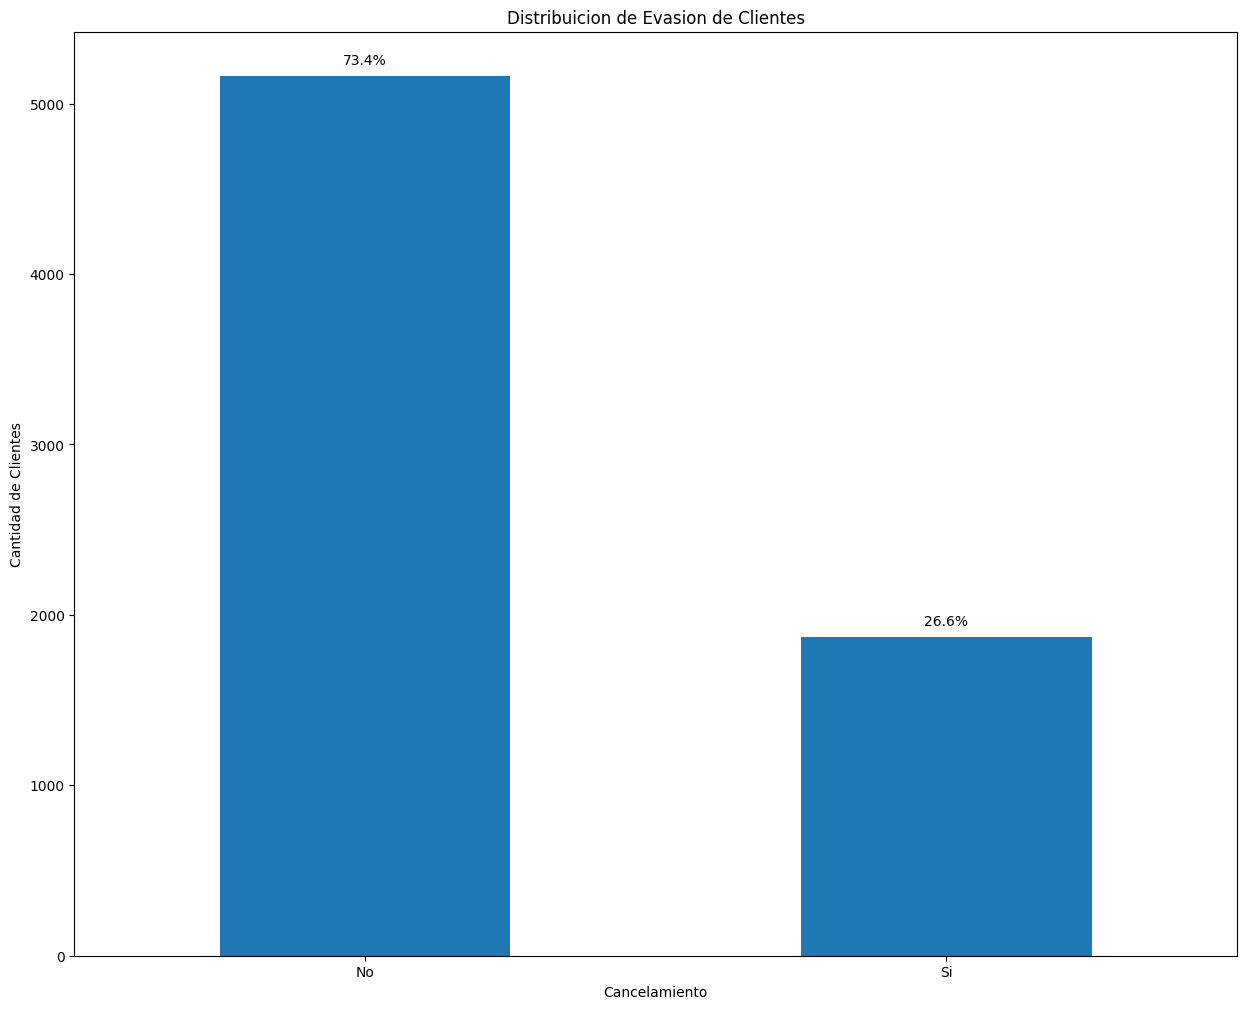

In [26]:
plt.figure(figsize=(15, 12))
churn_counts = df['Churn'].value_counts()
churn_percentages = (churn_counts / len(df)) * 100

ax = churn_counts.plot(kind='bar')
plt.title('Distribuicion de Evasion de Clientes')
plt.xlabel('Cancelamiento')
plt.ylabel('Cantidad de Clientes')
plt.xticks(rotation=0)

for i, percentage in enumerate(churn_percentages):
    ax.text(i, churn_counts.iloc[i] + 50, f'{percentage:.1f}%', ha='center', va='bottom')

plt.show()

Podemos notar que el 26.6% ha cancelado el servicio por alguna razón, es un numero alto de cancelaciones, así que vamos a profundizar un poco en los datos para determinar cual o cuales son las razones de dichas bajas del servicio.

In [27]:
import plotly.express as px

In [28]:
px.histogram(df,x='genero',text_auto= True, color= 'Churn',barmode='group' )

In [29]:
px.histogram(df,x='tiempo_contrato',text_auto= True, color= 'Churn',barmode='group' )

### Suscripciones Mensuales

Las suscripciones mensuales son las que tienen una mayor tasa de cancelación y puede ser por diferentes motivos


In [30]:
px.histogram(df, x='tipo_contrato', text_auto= True, color= 'Churn', barmode='group')



###Tipo de Internet

In [31]:
px.histogram(df, x='tipo_internet', text_auto= True, color= 'Churn', barmode='group')

###Método de Pago

In [32]:
px.histogram(df, x='metodo_pago', text_auto= True, color= 'Churn', barmode='group')

###Soporte Técnico

In [33]:
px.histogram(df, x = 'soporte_tecnico', text_auto = True, color = 'Churn', barmode = 'group')

In [34]:
px.histogram(df, x = 'servicio_telefono', text_auto = True, color = 'Churn', barmode = 'group')

###Actividad Extra


--- Gráfico: Relación entre Cuenta Diaria y Evasión ---



--- Gráfico: Número de Servicios Contratados vs. Evasión ---



--- Heatmap: Correlación de Variables con Evasión (Churn) ---


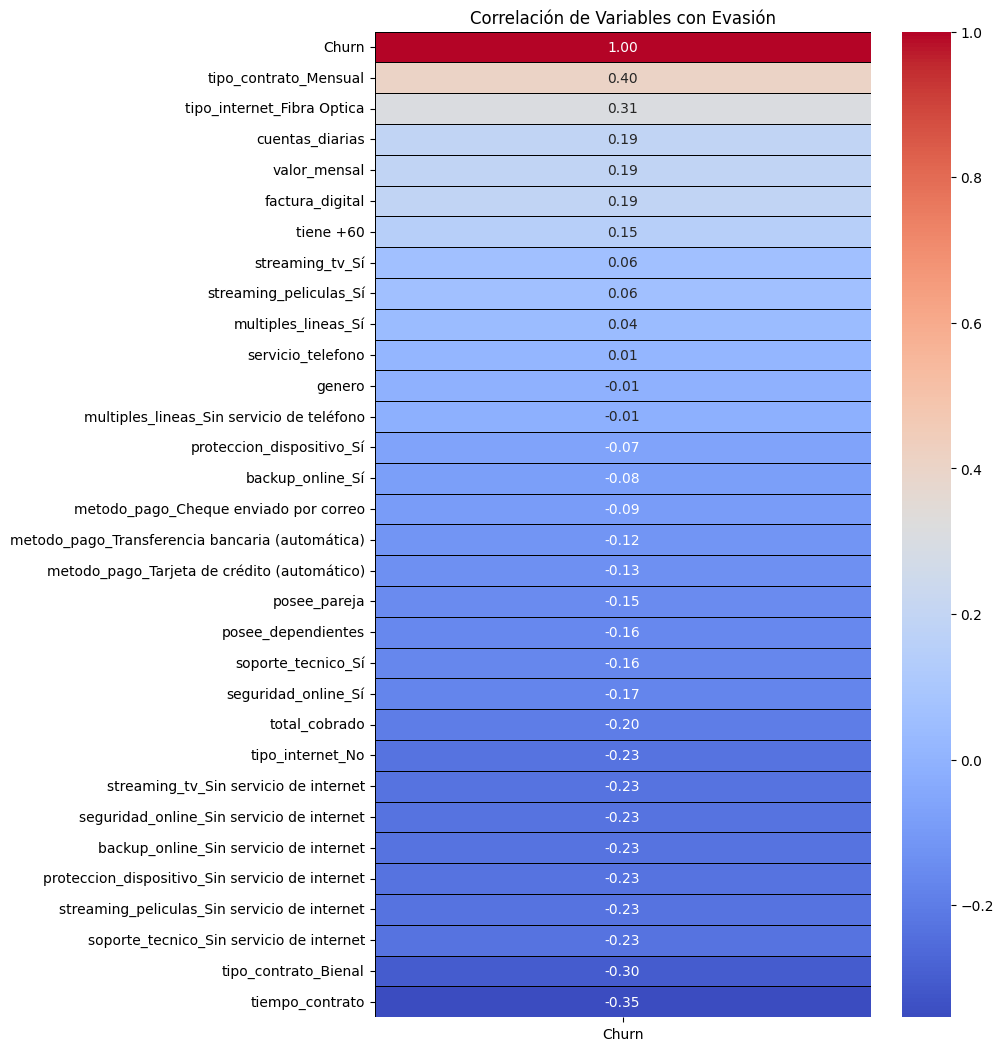

In [37]:
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# --- 1. Relación entre la cuenta diaria y la evasión (Churn) ---
# Convert 'Churn' to numerical for consistent analysis and plotting
df_churn_analysis = df.copy()
df_churn_analysis['Churn_numeric'] = df_churn_analysis['Churn'].map({'No': 0, 'Si': 1})

print("\n--- Gráfico: Relación entre Cuenta Diaria y Evasión ---")
fig_diarias = px.box(df_churn_analysis, x='Churn', y='cuentas_diarias',
                     title='Relación entre Cuenta Diaria y Evasión',
                     labels={'cuentas_diarias': 'Cuentas Diarias', 'Churn': 'Evasión'})
fig_diarias.show()

# --- 2. Cómo la cantidad de servicios contratados afecta la probabilidad de churn ---
# Identify and convert service-related columns to numerical (1 for 'Sí'/'DSL'/'Fibra Optica', 0 otherwise)

df_services = df.copy()
df_services['Churn_numeric'] = df_services['Churn'].map({'No': 0, 'Si': 1})

# Phone services
df_services['phone_service_binary'] = df_services['servicio_telefono'].map({'Sí': 1, 'No': 0})
df_services['multiple_lines_binary'] = df_services['multiples_lineas'].map({'Sí': 1, 'No': 0, 'Sin servicio de teléfono': 0})

# Internet service presence
df_services['internet_service_presence_binary'] = df_services['tipo_internet'].map({'DSL': 1, 'Fibra Optica': 1, 'No': 0})

# Other internet features (security, backup, etc.)
internet_feature_cols = [
    'seguridad_online', 'backup_online', 'proteccion_dispositivo',
    'soporte_tecnico', 'streaming_tv', 'streaming_peliculas'
]

for col in internet_feature_cols:
    df_services[f'{col}_binary'] = df_services[col].map({'Sí': 1, 'No': 0, 'Sin servicio de internet': 0})

# Sum all binary service columns to get total number of services
service_sum_cols = [col for col in df_services.columns if col.endswith('_binary')]
df_services['total_servicios_contratados'] = df_services[service_sum_cols].sum(axis=1)

print("\n--- Gráfico: Número de Servicios Contratados vs. Evasión ---")
fig_services = px.histogram(df_services, x='total_servicios_contratados', color='Churn',
                            barmode='group', title='Número de Servicios Contratados vs. Evasión',
                            labels={'total_servicios_contratados': 'Número de Servicios', 'count': 'Cantidad de Clientes', 'Churn': 'Evasión'})
fig_services.update_layout(xaxis_title="Número de Servicios Contratados", yaxis_title="Cantidad de Clientes")
fig_services.show()

# --- 3. Matriz de correlación con Churn ---
# Prepare DataFrame for correlation matrix by encoding all categorical variables
df_corr_matrix = df.copy()

# Convert Churn to numerical
df_corr_matrix['Churn'] = df_corr_matrix['Churn'].map({'No': 0, 'Si': 1})

# Identify categorical columns for encoding (excluding 'ID' and already numerical columns)
categorical_cols = df_corr_matrix.select_dtypes(include='object').columns.tolist()
if 'ID' in categorical_cols:
    categorical_cols.remove('ID')

# Drop the 'ID' column from the DataFrame as it's not relevant for correlation calculations
df_corr_matrix = df_corr_matrix.drop('ID', axis=1)

# Apply Label Encoding for binary columns and One-Hot Encoding for multi-category columns
for col in categorical_cols:
    if df_corr_matrix[col].nunique() == 2: # Binary categorical
        le = LabelEncoder()
        df_corr_matrix[col] = le.fit_transform(df_corr_matrix[col])
    else: # Multi-category, use one-hot encoding
        df_corr_matrix = pd.get_dummies(df_corr_matrix, columns=[col], prefix=col, drop_first=True) # drop_first to avoid multicollinearity

# Calculate correlation matrix
correlation_matrix = df_corr_matrix.corr()

# Focus on correlations with 'Churn' and sort them
churn_correlations = correlation_matrix['Churn'].sort_values(ascending=False).to_frame()

print("\n--- Heatmap: Correlación de Variables con Evasión (Churn) ---")
plt.figure(figsize=(8, max(10, len(churn_correlations) * 0.4)))
sns.heatmap(churn_correlations, annot=True, cmap='coolwarm', fmt=".2f",
            cbar=True, linewidths=.5, linecolor='black')
plt.title('Correlación de Variables con Evasión')
plt.yticks(rotation=0)
plt.show()

# Conclusión

Después de revisar los datos proporcionados por TelecomX, podemos concluir cuales son los principales motivos por lo cual la gente ha cancelado el servicio y sugerir mejoras para la continuidad de ello.



1.   Los que tienen una suscripción mensual, refleja el mayor numero de cancelamiento, es decir se puede ofrecer algún paquete para que no cancelen el servicio, promociones como tal no lo considero tan viable, pues cuando estas terminen pueden cancelar.
2.   Eliminar el pago de cheque electronico, puede que se presente fallas cuando realizan su pago por ese método o que tarde en procesar, o algún otro motivo, pero especificamente ese método de pago tiene un gran número de cancelaciones, y bien puede ser sustituido por la transferencia electronica o pago con tarjeta. Así se puede reducir un gran numero de cancelaciones.
3. Se sugiere recordad al equipo de atención a cliente que todos los clientes pueden hacer uso del servicio tecnico, pues revisando los datos nos percatamos que la mayoría que cancelaba no usaba el servicio tecnico, puede ser porque no sabía que tienen acceso a uno, o que si tuvieron algún problema con su servicio se puede ir a revisar, pues los clientes deben disfrutar el servicio que están pagando.
4. Asimismo el internet con fibra optica presenta fallas y eso lleva a la gente a cancelar, se tiene que verificar como se esta haciendo la instalación para valorar que es lo que hace que presente tantas fallas, pueden ser factores como el clima, el suelo, etc.

Podemos notar que hay más parametros que se pudieran analizar para deducir aun más el porqué las cancelaciones, pero revisando bien, son las importantes las antes mencionadas.

Como solución también se pueden crear paquetes de solo internet con algún tipo de streaming, o telefono con internet a un costo bajo, descuento a personas de la tercera edad, etc.
